In [1]:
import json
with open('gearnet_pretrained_pipeline.json', 'r') as f:
    data = json.load(f)

at 0, 0: {'micro_auroc': 0.8840883374214172, 'mcc': 0.4696468001671769}
at 0, 1: {'micro_auroc': 0.8711826801300049, 'mcc': 0.47409545305080203}
at 0, 2: {'micro_auroc': 0.8916357159614563, 'mcc': 0.4851337477456288}
at 1, 0: {'micro_auroc': 0.9033694863319397, 'mcc': 0.5164652389867656}
at 1, 1: {'micro_auroc': 0.8941637277603149, 'mcc': 0.525813321305577}
at 1, 2: {'micro_auroc': 0.893464982509613, 'mcc': 0.5188881925888791}
at 2, 0: {'micro_auroc': 0.8907574415206909, 'mcc': 0.5071397504725516}
at 2, 1: {'micro_auroc': 0.8982232809066772, 'mcc': 0.5177205947197203}
at 2, 2: {'micro_auroc': 0.8923734426498413, 'mcc': 0.5338566794061378}
at 3, 0: {'micro_auroc': 0.8938384652137756, 'mcc': 0.5051258944178812}
at 3, 1: {'micro_auroc': 0.8853376507759094, 'mcc': 0.5031159683277887}
at 3, 2: {'micro_auroc': 0.8946555852890015, 'mcc': 0.5254907618606457}
at 4, 0: {'micro_auroc': 0.9007803201675415, 'mcc': 0.5123163955721506}
at 4, 1: {'micro_auroc': 0.8974413275718689, 'mcc': 0.52270500466

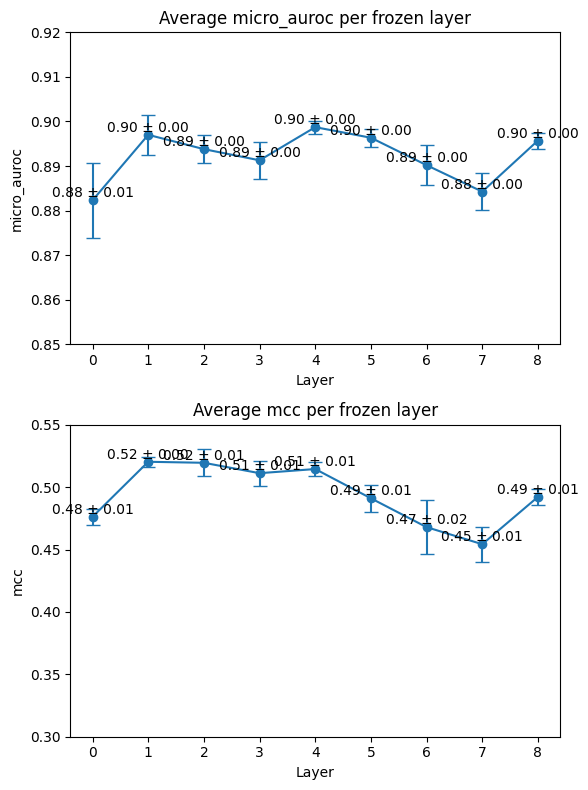

In [15]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

layers = list(range(9))

avg_metrics = {'micro_auroc': [], 'mcc': []}
std_metrics = {'micro_auroc': [], 'mcc': []}

for layer in range(9):
    layer_data = [d for d in data if d['layer'] == layer]
    
    metrics = {'micro_auroc': [], 'mcc': []}
    for trial in range(3):
        trial_data = [d for d in layer_data if d['trial'] == trial]
        last_epoch_metric = trial_data[-1]['data']
        print(f'at {layer}, {trial}: {last_epoch_metric}')
        
        metrics['micro_auroc'].append(last_epoch_metric['micro_auroc'])
        metrics['mcc'].append(last_epoch_metric['mcc'])
    
    avg_metrics['micro_auroc'].append(np.mean(metrics['micro_auroc']))
    avg_metrics['mcc'].append(np.mean(metrics['mcc']))
    std_metrics['micro_auroc'].append(np.std(metrics['micro_auroc']))
    std_metrics['mcc'].append(np.std(metrics['mcc']))

# Plotting
fig, axs = plt.subplots(2, figsize=(6,8))

# micro_auroc plot
axs[0].errorbar(layers, avg_metrics['micro_auroc'], yerr=std_metrics['micro_auroc'], fmt='-o', capsize=5)
axs[0].set_title('Average micro_auroc per frozen layer')
axs[0].set_xlabel('Layer')
axs[0].set_ylabel('micro_auroc')
axs[0].set_ylim([0.85, 0.92])

# Add labels to micro_auroc data points
for layer, avg, std in zip(layers, avg_metrics['micro_auroc'], std_metrics['micro_auroc']):
    axs[0].text(layer, avg, '%.2f ± %.2f' % (avg, std), ha='center', va='bottom')

# mcc plot
axs[1].errorbar(layers, avg_metrics['mcc'], yerr=std_metrics['mcc'], fmt='-o', capsize=5)
axs[1].set_title('Average mcc per frozen layer')
axs[1].set_xlabel('Layer')
axs[1].set_ylabel('mcc')
axs[1].set_ylim([0.3, 0.55])

# Add labels to mcc data points
for layer, avg, std in zip(layers, avg_metrics['mcc'], std_metrics['mcc']):
    axs[1].text(layer, avg, '%.2f ± %.2f' % (avg, std), ha='center', va='bottom')

plt.tight_layout()
plt.show()
